In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [413]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [414]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [415]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


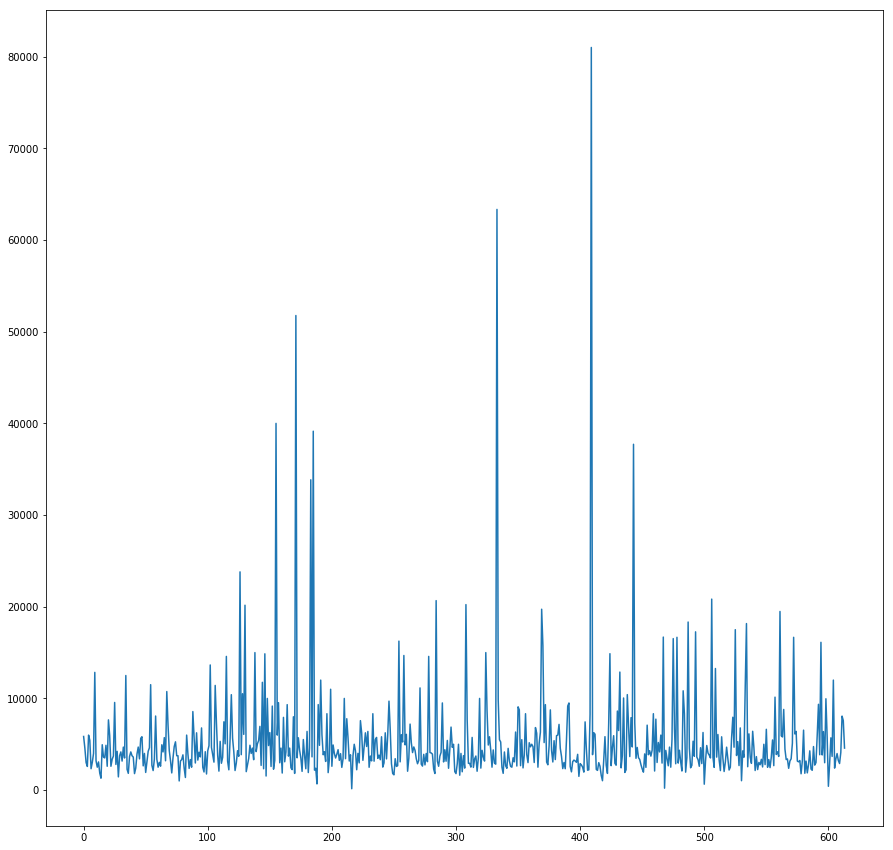

In [396]:
plt.figure(figsize=(15,15))
plt.plot(train['ApplicantIncome'])
plt.show()

In [397]:
def getPurchaseVar(compute_df, purchase_df, var_name,var_to_grouped):
        grouped_df = purchase_df.groupby(var_name)
        min_dict = {}
        max_dict = {}
        mean_dict = {}
        twentyfive_dict = {}
        seventyfive_dict = {}
        for name, group in grouped_df:
                min_dict[name] = min(np.array(group[var_to_grouped]))
                max_dict[name] = max(np.array(group[var_to_grouped]))
                mean_dict[name] = np.mean(np.array(group[var_to_grouped]))
                twentyfive_dict[name] = np.percentile(np.array(group[var_to_grouped]),25)
                seventyfive_dict[name] = np.percentile(np.array(group[var_to_grouped]),75)

        min_list = []
        max_list = []
        mean_list = []
        twentyfive_list = []
        seventyfive_list = []
        for index, row in compute_df.iterrows():
                name = row[var_name]
                min_list.append(min_dict.get(name,0))
                max_list.append(max_dict.get(name,0))
                mean_list.append(mean_dict.get(name,0))
                twentyfive_list.append( twentyfive_dict.get(name,0))
                seventyfive_list.append( seventyfive_dict.get(name,0))

        return min_list, max_list, mean_list, twentyfive_list, seventyfive_list



In [398]:
def cat_creator(integer,multiple):
    if(integer==np.nan):
        return int(integer/multiple)
    return None

In [399]:
for df in test,train:
    df['income_sum']=df['ApplicantIncome']+df['CoapplicantIncome']
    df['income_loan_ratio']=df['income_sum']/df['LoanAmount']
    df['applicant_income_cat']=df['ApplicantIncome'].apply(lambda x: int(x/1000))  
    df['cooaplicant_income_cat']=df['CoapplicantIncome'].apply(lambda x: int(x/1000))    
    df['income_sum_cat']=df['income_sum'].apply(lambda x: int(x/1000))
    df['loan_amount_cat']=df['LoanAmount'].apply(lambda x: cat_creator(x,1000))
    df['income_loan_ratio_cat']=df['income_loan_ratio'].apply(lambda x: cat_creator(x,10))
    

In [400]:
var=['Education','Property_Area']
from sklearn.preprocessing import LabelEncoder

for x in var:
    l=LabelEncoder()
    train[x]=l.fit_transform(train[x].astype('str'))
    print(l.classes_)
    test[x]=l.transform(test[x].astype('str'))

l_status=LabelEncoder()
train['Loan_Status']=l_status.fit_transform(train['Loan_Status'])
    

['Graduate' 'Not Graduate']
['Rural' 'Semiurban' 'Urban']


In [401]:

marry=("Yes","No")
for df in train,test:
    for key,value in zip(marry,(1,0)):
             df.loc[df['Married']==key,'Married']=int(value)
             df.loc[df['Self_Employed']==key,'Self_Employed']=int(value)
dependent=("0","1","2","3+")
for df in train,test:
    for key,value in zip(dependent,(0,1,2,10)):
             df.loc[df['Dependents']==key,'Dependents']=int(value)
           
gender=("Male","Female")
for df in train,test:
    for key,value in zip(gender,(0,1)):
             df.loc[df['Gender']==key,'Gender']=int(value) 


In [402]:
arr=['Married','Dependents','Gender','Self_Employed']
for x in arr:
    train[x]=train[x].fillna(-1)
    test[x]=test[x].fillna(-1)
    

In [43]:
#train=train.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1)
#test=test.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1)

In [421]:
train.groupby(['Property_Area']).size()


Property_Area
Rural        179
Semiurban    233
Urban        202
dtype: int64

In [390]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train.drop(['Loan_ID','Loan_Status'],axis=1).astype(float),train['Loan_Status'])

0.01 0.779220779221
0.0122272727273 0.779220779221
0.0144545454545 0.779220779221
0.0166818181818 0.779220779221
0.0189090909091 0.779220779221
0.0211363636364 0.779220779221
0.0233636363636 0.779220779221
0.0255909090909 0.779220779221
0.0278181818182 0.779220779221
0.0300454545455 0.779220779221
0.0322727272727 0.779220779221
0.0345 0.779220779221
0.0367272727273 0.779220779221
0.0389545454545 0.779220779221
0.0411818181818 0.779220779221
0.0434090909091 0.779220779221
0.0456363636364 0.779220779221
0.0478636363636 0.766233766234
0.0500909090909 0.766233766234
0.0523181818182 0.766233766234
0.0545454545455 0.766233766234
0.0567727272727 0.766233766234
0.059 0.766233766234
0.0612272727273 0.766233766234
0.0634545454545 0.766233766234
0.0656818181818 0.766233766234
0.0679090909091 0.766233766234
0.0701363636364 0.772727272727
0.0723636363636 0.772727272727
0.0745909090909 0.772727272727
0.0768181818182 0.772727272727
0.0790454545455 0.772727272727
0.0812727272727 0.772727272727
0.0835 

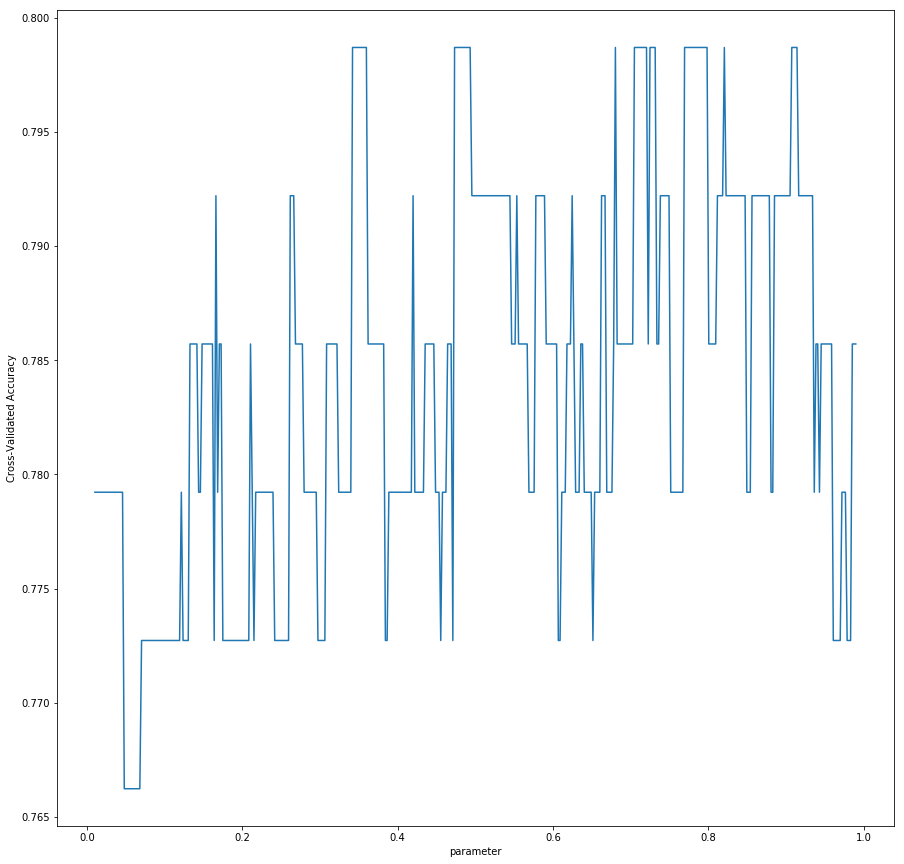

In [403]:
from sklearn.metrics import accuracy_score
#k_range=range(0,20)
k_range=np.linspace(0.01,0.99,441)
score=[]
for k in k_range:
    clo=xgb.XGBClassifier(n_estimators=100,
                           max_depth=5,
                          min_child_weight=2,
                         gamma=k,   
                          subsample=0.361,
                         reg_lambda=1,
                          base_score=0.5
    )
    clo.fit(x_train,y_train)
    pred=clo.predict(x_test)
    scor=accuracy_score(pred,y_test)
    print(k,scor)
    score.append(scor)
plt.figure(figsize=(15,15))    
plt.plot(k_range,score)
plt.xlabel('parameter')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

0.01 0.792207792208
0.0122272727273 0.792207792208
0.0144545454545 0.792207792208
0.0166818181818 0.792207792208
0.0189090909091 0.792207792208
0.0211363636364 0.792207792208
0.0233636363636 0.792207792208
0.0255909090909 0.792207792208
0.0278181818182 0.792207792208
0.0300454545455 0.792207792208
0.0322727272727 0.792207792208
0.0345 0.792207792208
0.0367272727273 0.792207792208
0.0389545454545 0.792207792208
0.0411818181818 0.792207792208
0.0434090909091 0.792207792208
0.0456363636364 0.792207792208
0.0478636363636 0.792207792208
0.0500909090909 0.792207792208
0.0523181818182 0.792207792208
0.0545454545455 0.792207792208
0.0567727272727 0.792207792208
0.059 0.792207792208
0.0612272727273 0.792207792208
0.0634545454545 0.792207792208
0.0656818181818 0.792207792208
0.0679090909091 0.792207792208
0.0701363636364 0.792207792208
0.0723636363636 0.792207792208
0.0745909090909 0.792207792208
0.0768181818182 0.792207792208
0.0790454545455 0.792207792208
0.0812727272727 0.792207792208
0.0835 

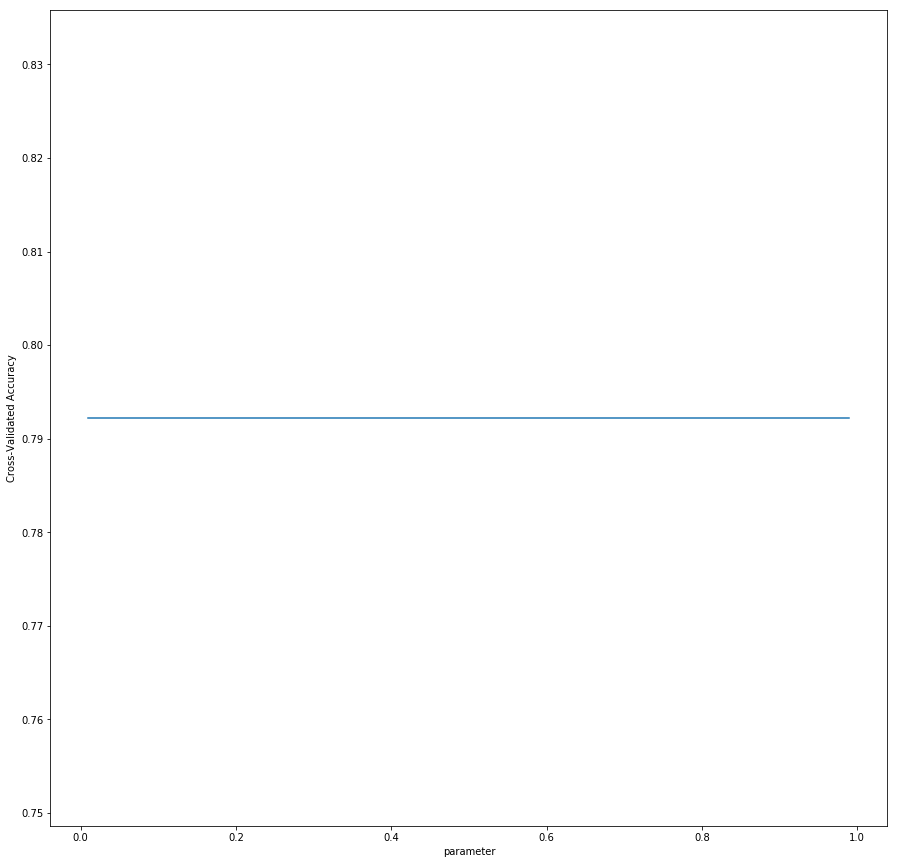

In [129]:
from sklearn.metrics import accuracy_score
#k_range=range(0,50)
k_range=np.linspace(0.01,0.99,441)
score=[]
x_train=x_train.fillna(-1)
x_test=x_test.fillna(-1)
for k in k_range:
    clo=Ada_boost=AdaBoostClassifier(
        learning_rate=0.05,
        random_state=0,
        n_estimators=60,
        
    )
    clo.fit(x_train,y_train)
    pred=clo.predict(x_test)
    scor=accuracy_score(pred,y_test)
    print(k,scor)
    score.append(scor)
plt.figure(figsize=(15,15))    
plt.plot(k_range,score)
plt.xlabel('parameter')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

0.0 0.688311688312
0.025 0.688311688312
0.05 0.688311688312
0.075 0.688311688312
0.1 0.688311688312
0.125 0.688311688312
0.15 0.688311688312
0.175 0.688311688312
0.2 0.688311688312
0.225 0.688311688312
0.25 0.688311688312
0.275 0.688311688312
0.3 0.688311688312
0.325 0.688311688312
0.35 0.688311688312
0.375 0.688311688312
0.4 0.688311688312
0.425 0.688311688312
0.45 0.688311688312
0.475 0.688311688312
0.5 0.688311688312
0.525 0.688311688312
0.55 0.688311688312
0.575 0.688311688312
0.6 0.688311688312
0.625 0.688311688312
0.65 0.688311688312
0.675 0.688311688312
0.7 0.688311688312
0.725 0.688311688312
0.75 0.688311688312
0.775 0.688311688312
0.8 0.688311688312
0.825 0.688311688312
0.85 0.688311688312
0.875 0.688311688312
0.9 0.688311688312
0.925 0.688311688312
0.95 0.688311688312
0.975 0.688311688312
1.0 0.688311688312


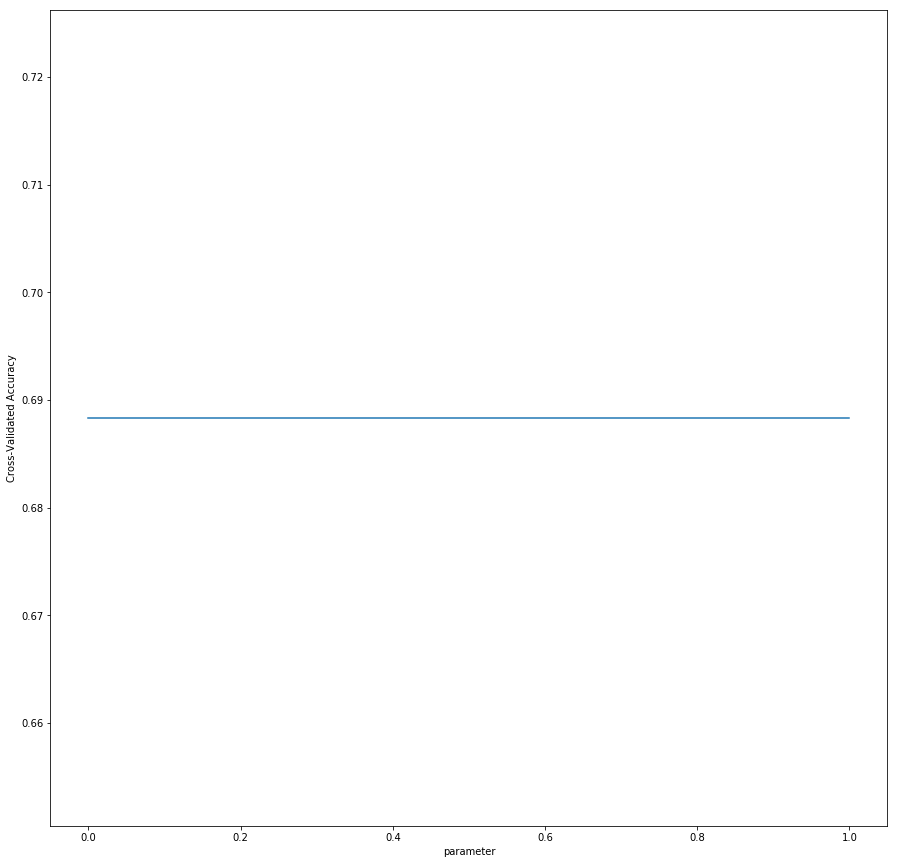

In [392]:
from sklearn.metrics import accuracy_score
#k_range=range(0,40)
k_range=np.linspace(0,1,41)
score=[]
x_train=x_train.fillna(-1)
x_test=x_test.fillna(-1)
for k in k_range:
    clo=RandomForestClassifier(
        min_impurity_decrease=0,
        random_state=5,
        min_samples_split=0.0505,
        n_jobs=2,
        max_leaf_nodes=5,
        min_samples_leaf=1,
        max_depth=6,
        n_estimators=80,
    )
    clo.fit(x_train,y_train)
    pred=clo.predict(x_test)
    scor=accuracy_score(pred,y_test)
    print(k,scor)
    score.append(scor)
plt.figure(figsize=(15,15))    
plt.plot(k_range,score)
plt.xlabel('parameter')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

39 0.707792207792
39 0.707792207792
39 0.707792207792
39 0.707792207792
39 0.707792207792
39 0.707792207792
39 0.707792207792
39 0.707792207792


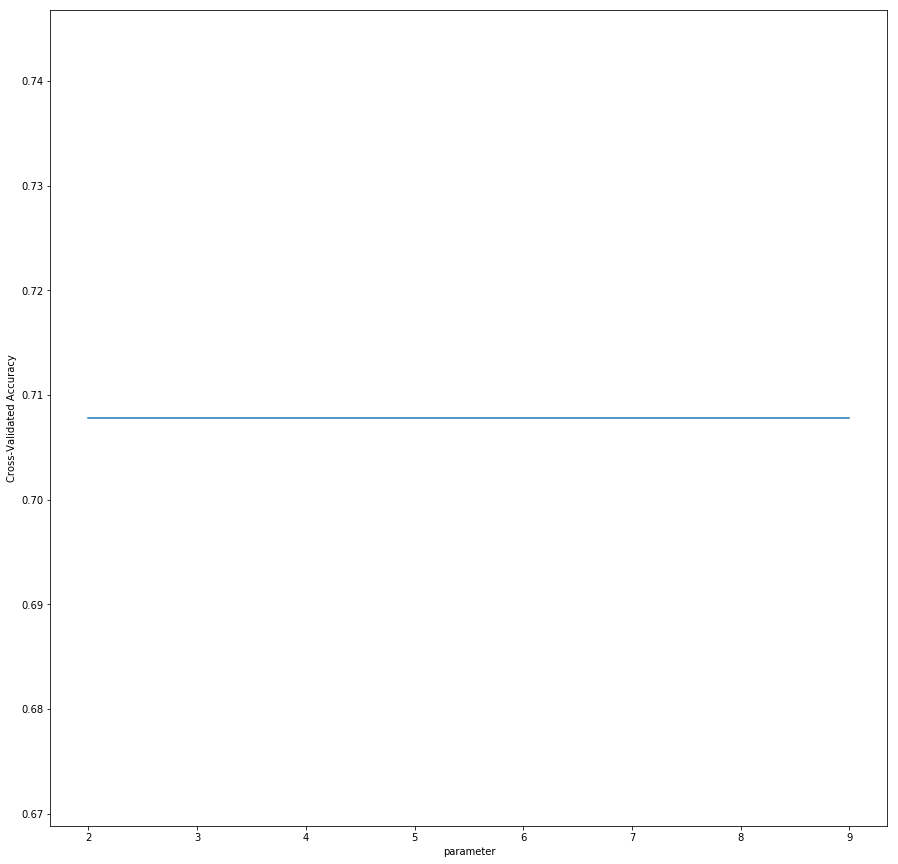

In [208]:
from sklearn.metrics import accuracy_score
k_range=range(2,10)
#k_range=np.linspace(0,1,41)
score=[]
x_train=x_train.fillna(-1)
x_test=x_test.fillna(-1)
for k in k_range:
    clo=BaggingClassifier( KNeighborsClassifier(),max_features=k,
                          max_samples=5 ,   
                          n_estimators=30,
                          
      )
    clo.fit(x_train,y_train)
    pred=clo.predict(x_test)
    scor=accuracy_score(pred,y_test)
    print(k1,scor)
    score.append(scor)
plt.figure(figsize=(15,15))    
plt.plot(k_range,score)
plt.xlabel('parameter')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

0.01 0.707792207792
0.03475 0.707792207792
0.0595 0.707792207792
0.08425 0.707792207792
0.109 0.707792207792
0.13375 0.707792207792
0.1585 0.707792207792
0.18325 0.707792207792
0.208 0.714285714286
0.23275 0.707792207792
0.2575 0.727272727273
0.28225 0.720779220779
0.307 0.753246753247
0.33175 0.75974025974
0.3565 0.766233766234
0.38125 0.75974025974
0.406 0.746753246753
0.43075 0.766233766234
0.4555 0.766233766234
0.48025 0.753246753247
0.505 0.746753246753
0.52975 0.746753246753
0.5545 0.75974025974
0.57925 0.746753246753
0.604 0.75974025974
0.62875 0.753246753247
0.6535 0.727272727273
0.67825 0.75974025974
0.703 0.75974025974
0.72775 0.766233766234
0.7525 0.75974025974
0.77725 0.75974025974
0.802 0.785714285714
0.82675 0.785714285714
0.8515 0.779220779221
0.87625 0.792207792208
0.901 0.792207792208
0.92575 0.785714285714
0.9505 0.798701298701
0.97525 0.805194805195
1.0 0.824675324675


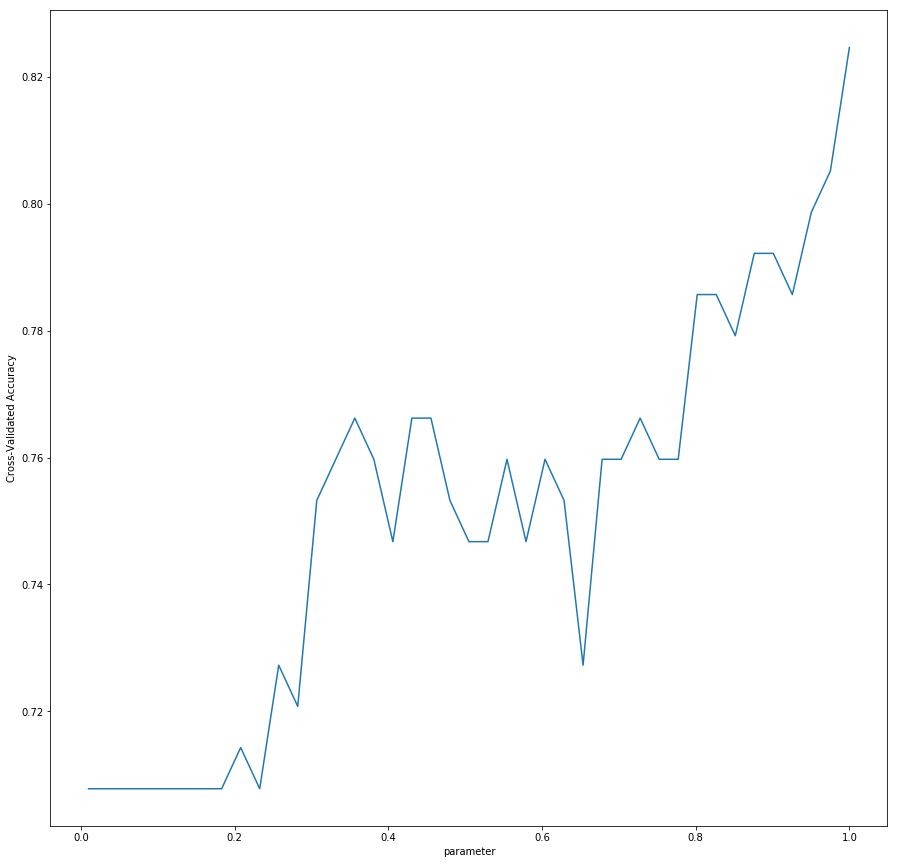

In [238]:
from sklearn.metrics import accuracy_score
#k_range=range(1,40)
k_range=np.linspace(0.01,1,41)
score=[]
x_train=x_train.fillna(-1)
x_test=x_test.fillna(-1)
for k in k_range:
    clo=GradientBoostingClassifier(n_estimators=120,
                                   subsample=1,
                                   min_samples_leaf=0.06175,
                                   learning_rate=0.1,
                                   random_state=42,
                                   max_features=6,max_depth=1,
                                   max_leaf_nodes=51)

    clo.fit(x_train,y_train)
    pred=clo.predict(x_test)
    scor=accuracy_score(pred,y_test)
    print(k,scor)
    score.append(scor)
plt.figure(figsize=(15,15))    
plt.plot(k_range,score)
plt.xlabel('parameter')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

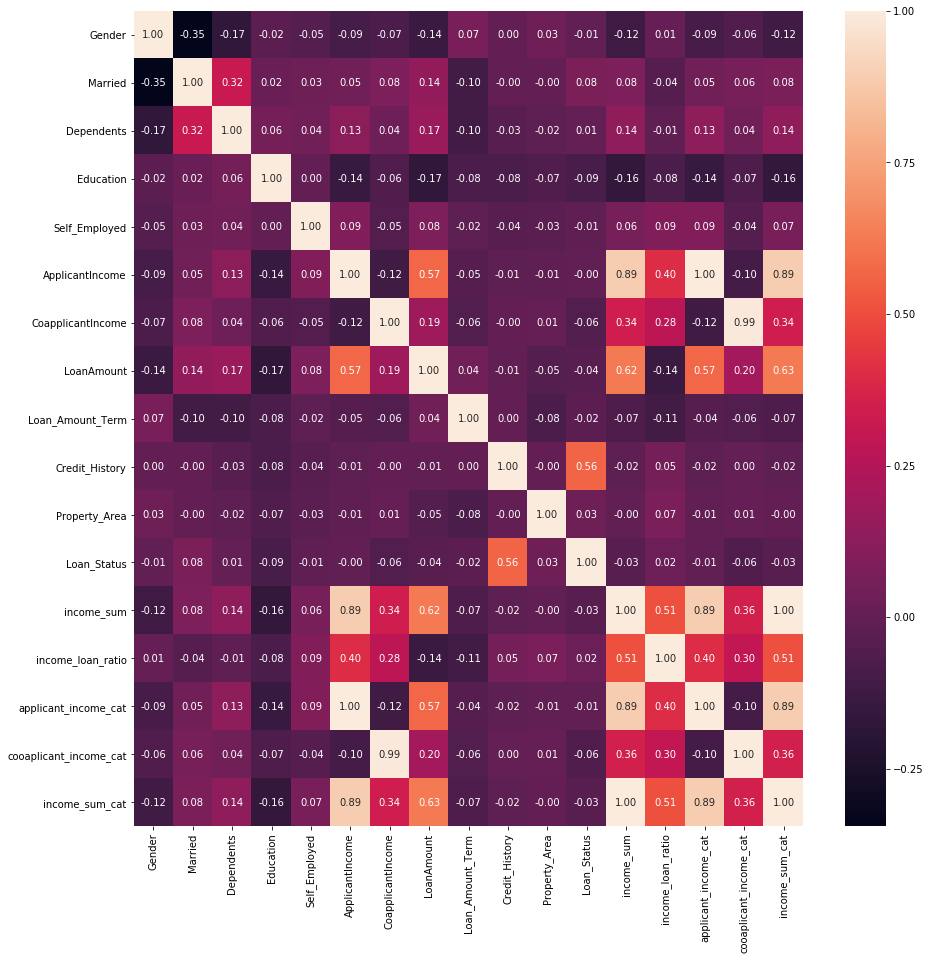

In [47]:
train_df=train.fillna(-1)
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.show()

In [411]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import xgboost as xgb


def score(params):
    print ("Training with params : ")
    print (params)
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(x_train.values, label=y_train.values)
    dvalid = xgb.DMatrix(x_test[x_train.columns], label=y_test)
    # watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = np.sqrt(mean_squared_error(y_test, predictions))
    print ("\tScore {0}\n\n".format(score))
    return {'loss': score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : hp.quniform('eta', 0.025, 0.5, 0.025),
             'max_depth' : hp.quniform('max_depth', 1, 7, 1),
             'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
             'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
             'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
             'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'objective': 'reg:linear',
             'silent' : 0,
            "booster" : "gbtree",
            }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=100)

    print (best)
trials = Trials()
optimize(trials)

TypeError: 'generator' object is not subscriptable

In [363]:
x_train=train.drop(['Loan_ID','Loan_Status'],axis=1).fillna(-1).astype(float)
y_train=train['Loan_Status']
x_test=test.drop(['Loan_ID'],axis=1).fillna(-1).astype(float)

In [318]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


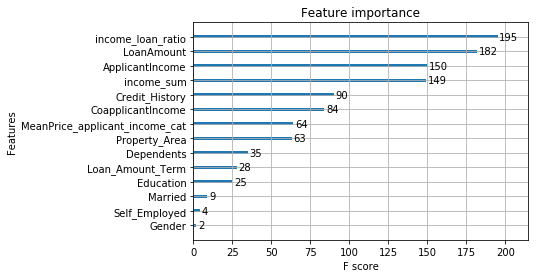

In [416]:

clf_xgb=xgb.XGBClassifier(n_estimators=100,
                           max_depth=5,
                          min_child_weight=2,
        #                 gamma=0.955,   
         #                 subsample=0.361,
          #               reg_lambda=1,
           #               base_score=0.5
   )
clf_xgb.fit(x_train,y_train)
pred_test_xgb=clf_xgb.predict(x_test)
pred_train_xgb=clf_xgb.predict(x_train)
xgb.plot_importance(clf_xgb)
plt.show()

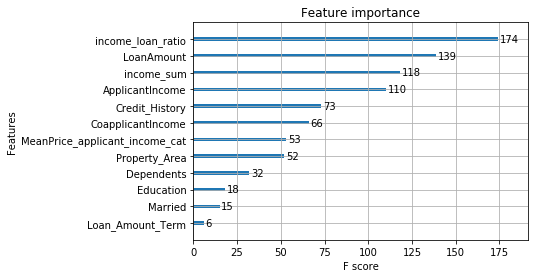

In [417]:

clf_xgb_2=xgb.XGBClassifier(n_estimators=100,
                           max_depth=7,
                          min_child_weight=5,
    )
clf_xgb_2.fit(x_train,y_train)
pred_test_xgb_2=clf_xgb_2.predict(x_test)
pred_train_xgb_2=clf_xgb_2.predict(x_train)
xgb.plot_importance(clf_xgb_2)
plt.show()

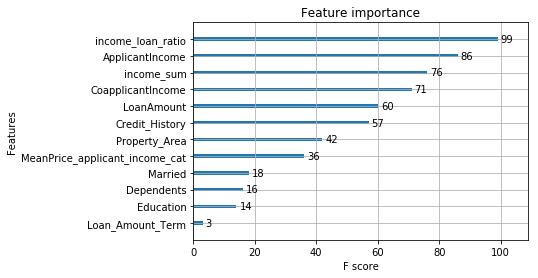

In [418]:

clf_xgb_3=xgb.XGBClassifier(n_estimators=100,
                           max_depth=12,
                          min_child_weight=8,
   )
clf_xgb_3.fit(x_train,y_train)
pred_test_xgb_3=clf_xgb_3.predict(x_test)
pred_train_xgb_3=clf_xgb_3.predict(x_train)
xgb.plot_importance(clf_xgb_3)
plt.show()

In [320]:
Ada_boost=AdaBoostClassifier(learning_rate=0.05,
        random_state=0,
        n_estimators=60,
     ).fit(x_train,y_train)
model_ad_train=Ada_boost.predict(x_train) 
model_ad_test=Ada_boost.predict(x_test)


In [321]:
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(
     KNeighborsClassifier(),oob_score=k,
                          max_samples=5 ,   
                          n_estimators=30,
       ).fit(x_train, y_train)
model_bg_train = bagging.predict(x_train)
model_bg_test = bagging.predict(x_test)


In [322]:
random_forest=RandomForestClassifier(
      min_impurity_decrease=0,
        random_state=5,
        min_samples_split=0.0505,
        n_jobs=2,
        max_leaf_nodes=5,
        min_samples_leaf=1,
        max_depth=6,
        n_estimators=80,
   ).fit(x_train,y_train)
model_rf_train = random_forest.predict(x_train)
model_rf_test = random_forest.predict(x_test)

In [323]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_boost = GradientBoostingClassifier(
n_estimators=120,
                                   subsample=1,
                                   min_samples_leaf=0.06175,
                                   learning_rate=0.1,
                                   random_state=42,
                                   max_features=6,max_depth=1,
                                   max_leaf_nodes=51).fit(x_train, y_train)
model_gb_train=Gradient_boost.predict(x_train)
model_gb_test=Gradient_boost.predict(x_test)                 


In [337]:
import catboost
clf_cat=catboost.CatBoostClassifier(learning_rate=0.01).fit(x_train,y_train)

model_cat_test=clf_cat.predict(x_test)
model_cat_test=model_cat_test.astype(int)

model_cat_train=clf_cat.predict(x_train)
model_cat_train=model_cat_train.astype(int)

In [345]:
len(model_ad_test)

367

In [346]:
base_predictions_train = pd.DataFrame( {'bagging': model_bg_train.ravel(),
     'Random_Forest': model_rf_train.ravel(),
     'AdaBoost': model_ad_train.ravel(),
      'GradientBoost': model_gb_train.ravel(),
      'CatBoost': model_cat_train.ravel()                                  
    })
base_predictions_test = pd.DataFrame( {'bagging': model_bg_test.ravel(),
     'Random_Forest': model_rf_test.ravel(),
       'AdaBoost': model_ad_test.ravel(),
       'GradientBoost': model_gb_test.ravel(),
      'CatBoost': model_cat_test.ravel()                                  
    })
X_new_train = base_predictions_train.as_matrix()
X_new_test = base_predictions_test.as_matrix()
base_predictions_train.head()


,AdaBoost,CatBoost,GradientBoost,Random_Forest,bagging
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


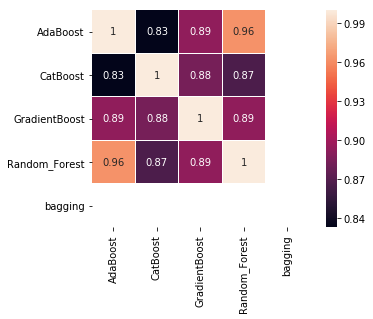

In [347]:
sns.heatmap(base_predictions_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()

In [348]:
xgboost = xgb.XGBClassifier(
    n_estimators=100,
                           max_depth=5,
                          min_child_weight=2,
                         gamma=0.955,   
                          subsample=0.361,
                         reg_lambda=1,
                          base_score=0.5).fit(X_new_train, y_train)
y_train_pred = xgboost.predict(X_new_train)
y_test_pred = xgboost.predict(X_new_test)
train_score = accuracy_score(y_train, y_train_pred)
#test_score = accuracy_score(y_test, y_test_pred)
print("Train_Score:",train_score)
#print("Test_Score:",test_score)


Train_Score: 0.864820846906


In [349]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1,

In [388]:
xgb_mixed_pred_train=pred_train_xgb*0.5+pred_train_xgb_2*0.3+pred_train_xgb_3*0.2
xgb_mixed_pred_test=pred_test_xgb*0.5+pred_test_xgb_2*0.3+pred_test_xgb_3*0.2
xgb_mixed_pred_train=np.array(xgb_mixed_pred_train,dtype=int)
xgb_mixed_pred_test=np.array(xgb_mixed_pred_test,dtype=int)

In [389]:
accuracy_score(xgb_mixed_pred_train,y_train)

0.85016286644951145

In [387]:
pred=l_status.inverse_transform(xgb_mixed_pred_test)

sub=pd.DataFrame()
sub['Loan_ID']=test['Loan_ID']
sub['Loan_Status']=pred
sub.to_csv('new_sub.csv',index=False)